In [6]:
import numpy as np

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
import  seaborn as sns
%matplotlib inline

In [8]:
confirmed_cases= pd.read_csv('./time_series_covid19_confirmed_global.csv')

In [9]:
confirmed_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,678,712,726,736,750,766,773,782,789,795
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,731,738,738,743,743,743,745,745,747,748
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,25,25,26,27,27,27,27,30,35,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,4,4,4,4,8,8,14,16,16,16
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1,1,1,1,1,6,6,7,10,10
264,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,3,3


In [10]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,678,712,726,736,750,766,773,782,789,795
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,731,738,738,743,743,743,745,745,747,748
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,25,25,26,27,27,27,27,30,35,35


In [11]:
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '4/24/20', '4/25/20', '4/26/20', '4/27/20', '4/28/20', '4/29/20',
       '4/30/20', '5/1/20', '5/2/20', '5/3/20'],
      dtype='object', length=107)

In [12]:
confirmed= confirmed_cases.loc[:,cols[4]:cols[-1]]

In [13]:
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20
0,0,0,0,0,0,0,0,0,0,0,...,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704
1,0,0,0,0,0,0,0,0,0,0,...,678,712,726,736,750,766,773,782,789,795
2,0,0,0,0,0,0,0,0,0,0,...,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474
3,0,0,0,0,0,0,0,0,0,0,...,731,738,738,743,743,743,745,745,747,748
4,0,0,0,0,0,0,0,0,0,0,...,25,25,26,27,27,27,27,30,35,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
262,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,8,8,14,16,16,16
263,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,6,6,7,10,10
264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,3,3


In [14]:
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20
0,0,0,0,0,0,0,0,0,0,0,...,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704
1,0,0,0,0,0,0,0,0,0,0,...,678,712,726,736,750,766,773,782,789,795
2,0,0,0,0,0,0,0,0,0,0,...,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474
3,0,0,0,0,0,0,0,0,0,0,...,731,738,738,743,743,743,745,745,747,748
4,0,0,0,0,0,0,0,0,0,0,...,25,25,26,27,27,27,27,30,35,35


In [15]:
dates =confirmed.keys()
world_cases= []
for i in dates:
    confirmed_sum=confirmed[i].sum()
    world_cases.append(confirmed_sum)

In [16]:
confirmed_sum

3506729

In [17]:
world_cases

[555,
 654,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19881,
 23892,
 27635,
 30794,
 34391,
 37120,
 40150,
 42762,
 44802,
 45221,
 60368,
 66885,
 69030,
 71224,
 73258,
 75136,
 75639,
 76197,
 76819,
 78572,
 78958,
 79561,
 80406,
 81388,
 82746,
 84112,
 86011,
 88369,
 90306,
 92840,
 95120,
 97886,
 101801,
 105847,
 109821,
 113590,
 118620,
 125875,
 128352,
 145219,
 156116,
 167466,
 181603,
 197113,
 214846,
 242616,
 272247,
 304555,
 337018,
 378282,
 418079,
 467723,
 529701,
 593423,
 660824,
 720285,
 782490,
 857608,
 932638,
 1013458,
 1095876,
 1176059,
 1249737,
 1321427,
 1396438,
 1480200,
 1565538,
 1657929,
 1736025,
 1835164,
 1905192,
 1975581,
 2055506,
 2151872,
 2239723,
 2317339,
 2400894,
 2471847,
 2549175,
 2624741,
 2708547,
 2795875,
 2881140,
 2955033,
 3023722,
 3097190,
 3172287,
 3256853,
 3343777,
 3427343,
 3506729]

In [18]:
day_since= np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases=np.array(world_cases).reshape(-1,1)

In [19]:
day_since

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [20]:
world_cases

array([[    555],
       [    654],
       [    941],
       [   1434],
       [   2118],
       [   2927],
       [   5578],
       [   6166],
       [   8234],
       [   9927],
       [  12038],
       [  16787],
       [  19881],
       [  23892],
       [  27635],
       [  30794],
       [  34391],
       [  37120],
       [  40150],
       [  42762],
       [  44802],
       [  45221],
       [  60368],
       [  66885],
       [  69030],
       [  71224],
       [  73258],
       [  75136],
       [  75639],
       [  76197],
       [  76819],
       [  78572],
       [  78958],
       [  79561],
       [  80406],
       [  81388],
       [  82746],
       [  84112],
       [  86011],
       [  88369],
       [  90306],
       [  92840],
       [  95120],
       [  97886],
       [ 101801],
       [ 105847],
       [ 109821],
       [ 113590],
       [ 118620],
       [ 125875],
       [ 128352],
       [ 145219],
       [ 156116],
       [ 167466],
       [ 181603],
       [ 1

In [21]:
days_in_future =10
future_forecast= np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates =future_forecast[:-10]

In [22]:
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [23]:
adjusted_dates

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [24]:
start='1/22/2020'
start_date = datetime.datetime.strptime(start,'%m/%d/%Y')
future_forcast_dates=[]
for i in range (len(future_forecast)):
    future_forcast_dates.append((start_date+datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [25]:
latest_confirmed =confirmed_cases[dates[-1]]

In [26]:
latest_confirmed

0      2704
1       795
2      4474
3       748
4        35
       ... 
261       6
262      16
263      10
264       3
265     128
Name: 5/3/20, Length: 266, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(day_since, world_cases, test_size=0.33, random_state=42)

In [28]:
kernel =['poly','sigmoid','rbf']
c = [0.01,0.1,1,10]
gamma = [0.01,0.1,1]
epsilon= [0.01,0.1,1]
shrinking =[True,False]
svm_grid ={'kernel':kernel ,'C': c, 'gamma':gamma,'epsilon':epsilon,'shrinking':shrinking}

svm= SVR()
svm_search = RandomizedSearchCV(svm,svm_grid,scoring='neg_mean_squared_error',cv=3,return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
svm_search.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s


KeyboardInterrupt: 

In [ ]:
svm_search.best_params_

In [ ]:
svm_confirmed = svm_search.best_estimator_
svm_pred =svm_confirmed.predict(future_forecast)

In [ ]:
svm_confirmed

In [ ]:
svm_pred

MAE: 106914.98669652209
MSE: 19412039664.18659


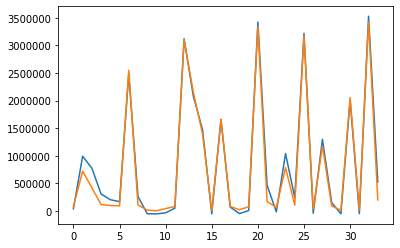

In [60]:
svm_test_pred =svm_confirmed.predict(X_test)
plt.plot(svm_test_pred)
plt.plot(y_test)
print('MAE:', mean_absolute_error(svm_test_pred, y_test))
print('MSE:', mean_squared_error(svm_test_pred,y_test))

In [61]:
adjusted_dates =future_forecast[:-10]

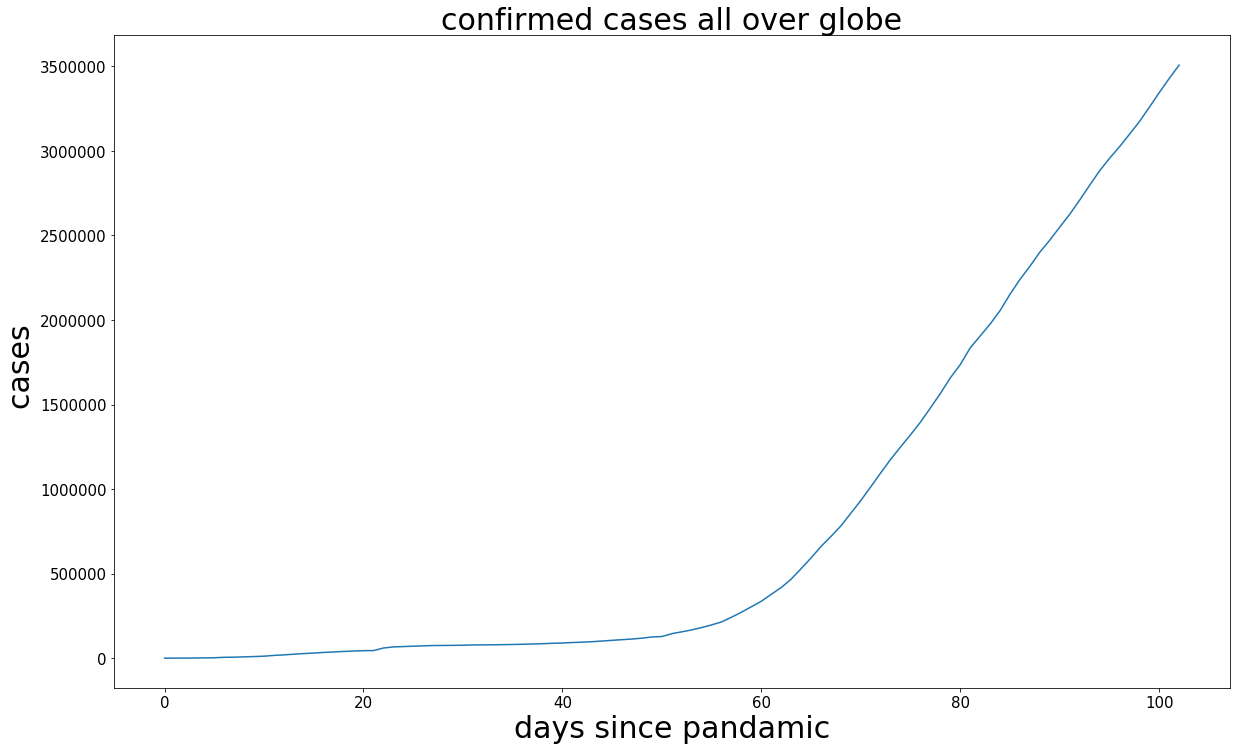

In [62]:
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, world_cases)
plt.title('confirmed cases all over globe',size=30)
plt.xlabel('days since pandamic',size=30)
plt.ylabel('cases ', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

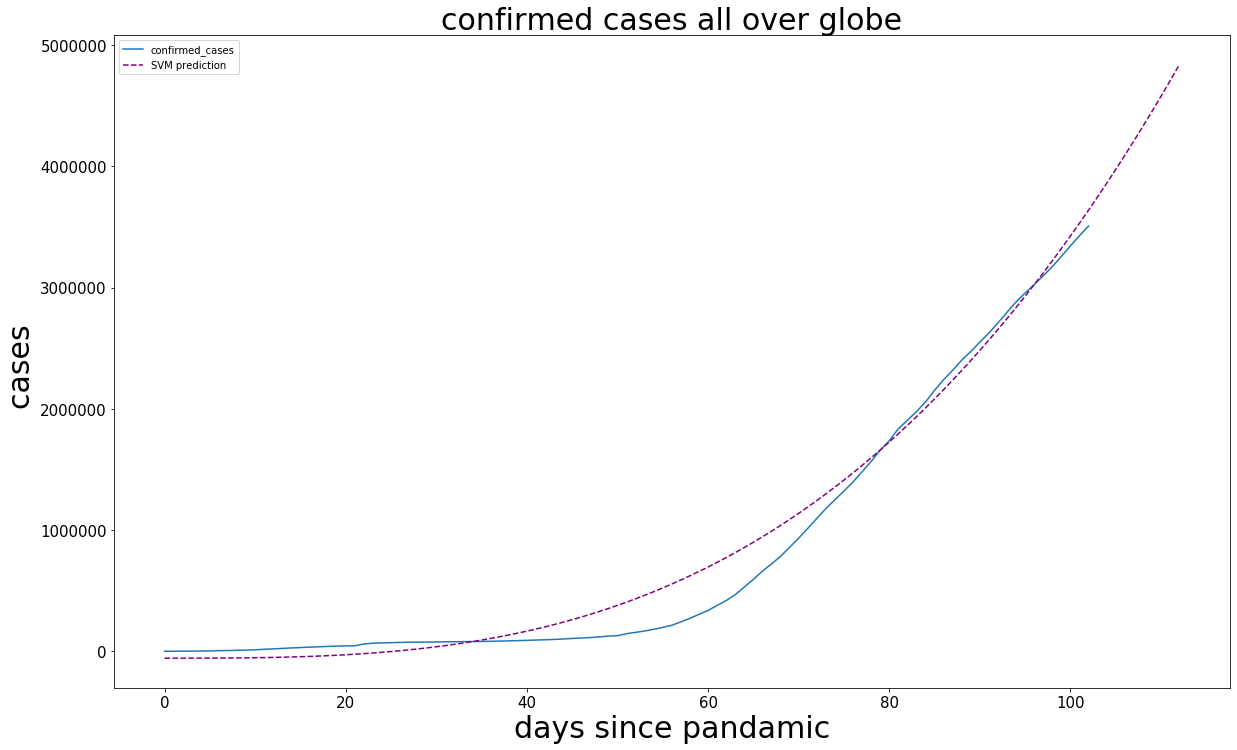

In [63]:
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast, svm_pred, linestyle='dashed', color='purple')
plt.title('confirmed cases all over globe',size=30)
plt.xlabel('days since pandamic',size=30)
plt.ylabel('cases ', size=30)
plt.legend(['confirmed_cases', 'SVM prediction'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [68]:
print('SVM future predictions:')
set(zip(future_forcast_dates[-10:], svm_pred[-10:]))

SVM future predictions:


{('05/04/2020', 3747472.837839545),
 ('05/05/2020', 3859345.6728538885),
 ('05/06/2020', 3973390.7283405676),
 ('05/07/2020', 4089628.891025962),
 ('05/08/2020', 4208081.047638358),
 ('05/09/2020', 4328768.084915579),
 ('05/10/2020', 4451710.889610709),
 ('05/11/2020', 4576930.3484463105),
 ('05/12/2020', 4704447.348141135),
 ('05/13/2020', 4834282.775463522)}

In [29]:
X_train, X_test, y_train, y_test = train_test_split(day_since, world_cases, test_size=0.33, random_state=42)

In [32]:
sns.pairplot(confirmed_cases)

KeyboardInterrupt: 

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)